# Gradient Shows Direction of Steepest Ascent

The gradient of a function "points" towards the direction at which the function increases the most. 

To see how everything works, consider a function $f(\vec{x})$ (with $\vec{x}$ and $N$-dimensional vector) evaluated at some $\vec{x} ^\prime =\vec{x} + \delta \vec{x}$ (with $\delta \vec{x}$ small). Then, we can write

$$
f(\vec{x} + \delta \vec{x}) =  f(\vec{x}) + \delta \vec{x} \cdot \vec\nabla f(\vec{x})  + \dots 
$$
with $\vec\nabla f(\vec{x}) \equiv \dfrac{\partial f(y_1,y_2,\dots,N)}{\partial y_i}\Big|_{\vec{y}=\vec{x}}$.


It becomes clear at this point that $f(\vec{x})$ becomes maximally increased when $\delta \vec{x}$ is parallel to $ \vec\nabla f(\vec{x})$, i.e. for $\vec{x}^\prime = \vec{x} + \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$). Also, $f(\vec{x})$ is maximally decreased for  $\vec{x}^\prime = \vec{x} - \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$).

One can easily understand this in the case $N=1,2,3$ as we can simply draw vectors and see what happens, but you can see <a href="#1">footnote <sup>1</sup></a> for a general proof. 


### Gradient Acsent/Descent
We would like to maximize or minimize $f(\vec{x})$. To do this, we can exploit the previous observation by starting at some point $\vec{x}$ and iteratively update $\vec{x} \to \vec{x} \pm \alpha \ \vec\nabla f(\vec{x})$, until maximization (+) or minimization (-) occures (say if $\vec\nabla f(\vec{x})$ becomes very small).  

The Gradient Acsent/Descent algorithm is maybe the simplest optimization algorith, as the only thing that needs is the derivative of the function. However, stopping conditions and local minima/maxima are a huge problem.
 
 
 
 
 
 
 <br>
 <br>
 <br>
 <br>
 <br>
 
 
---
<p id="#1" style="font-size:8pt" ><sup>1</sup>
Basically, this statement comes from the fact that for two $R^N$ vectors, $\vec{a},\vec{b}$, it holds that $|\vec{a}\cdot \vec{b}| \leq ||\vec{a}||||\vec{b}||$. Here is the proof:
<br>
We start by defining the inner product as $$\vec{a}\cdot \vec{b} \equiv \displaystyle\sum_i a_i b_i.$$ Therefore, $$\vec{a}\cdot \vec{a} = || \vec a ||^2 \geq 0.$$
<br>
With these definitions, we write
$$
\Big|\Big|\vec{x} - \dfrac{\vec{x}\cdot \vec{y}}{||\vec{y}||^2}\vec{y} \Big|\Big|^2 \geq 0 
\Rightarrow 
||\vec{x}||^2 + \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} -2 \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow \\
||\vec{x}||^2 - \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow
(\vec{x}\cdot \vec{y})^2 \leq ||\vec{x}||^2 ||\vec{y}||^2 
\Rightarrow \\
|\vec{x}\cdot \vec{y}| \leq ||\vec{x}|| ||\vec{y}|| \;.
$$
<br>
Note also that this generalizes trivially to $C^N$ spaces to $\langle y|x \rangle \leq ||\vec{x}|| ||\vec{y}||$, with  $\langle y|x \rangle \displaystyle \sum_i y^{*}_i x_i$.
</p>

Lets make a Gradient Descent minimizer class to see how it works (maximization quite trivial once you get how it works).

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
class GradientDescent:
    def __init__(self,target,x0,alpha=1e-1,tol=1e-8,step_break=100):
        '''
        target: the target function to be minimized, with target.Gard its gradient
                      
        x0: starting point
        
        alpha: the alpha parameter
        
        tol, step_break: stop when the gradient becomes smaller than tol/alpha for step_break consecutive steps
        '''
        
        self.function=target
        
        self.gradFunction=target.Grad
        
        self.alpha=alpha
        self.tol=tol
        self.step_break=step_break
        
        
        self.x0=[_ for _ in x0]
        self.x=[_ for _ in x0]
        
        self.grad=[0 for _ in x0]
        
        
    def update(self):
        self.gradFunction(self.x,self.grad)
        self.x = [ self.x0[i] - self.alpha*grad for i,grad in enumerate(self.grad)]
    
    def run(self):
        
        _s=0
        
        self.steps=[]#store the steps here
        
        while True:
            self.update()
            
            _check= np.sqrt(np.sum([_**2 for _ in self.grad] ))
            
            self.x0 = [ _ for _ in self.x]
            
            self.steps.append(self.x)
            
            if _check<self.tol/self.alpha:
                _s+=1
            else:
                _s=0
            
            if _s>self.step_break:
                break
        
        
        return self.x

This is how the target should look like

In [18]:
class targetFunc:
    def __init__(self,func,dim,h=1e-5):
        self.function =func
        self.dimension=dim
        self.h=h
        
    def __call__(self,x):
        return self.function(x)
    
    def Grad(self,x,Grad):#Grad is "passed by reference" and stores the Gradient
        x0=[_ for _ in x]
        x1=[_ for _ in x]
        
        
        for dim in range(self.dimension):
            x0[dim]=x[dim]-self.h
            x1[dim]=x[dim]+self.h
            
            dfdx0=self.function(x0) 
            dfdx1=self.function(x1) 

            x0[dim]=x[dim]
            x1[dim]=x[dim]
            
            Grad[dim]=(dfdx1-dfdx0)/(2*self.h)
            
        

Example:

Let's minimize $$ f(x_1,x_2) = 1- e^{ -( x_1^2 + x_2^2)  }  $$

In [4]:
def func(x):
    return 1-np.exp(-(x[0]**2+x[1]**2))

In [5]:
target=targetFunc(func,2)

In [9]:
GD=GradientDescent(target,[-0.1,2],alpha=1e-1,tol=1e-8,step_break=5e2)

In [10]:
GD.run()

[-2.120442710307202e-12, 1.885602785023366e-12]

<IPython.core.display.Javascript object>


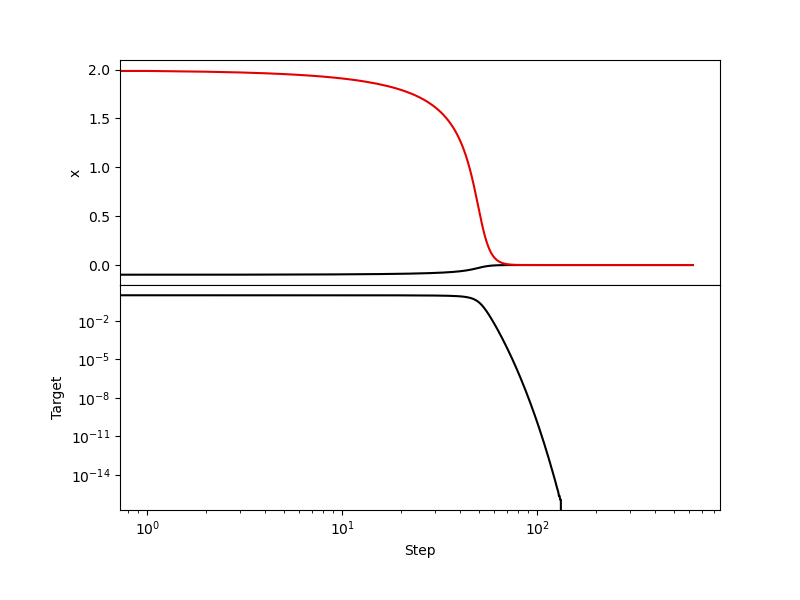

In [17]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(GD.steps)[:,0],c='xkcd:black')
sub.plot(np.array(GD.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
sub.plot([target(i) for i in GD.steps],c='xkcd:black')

sub.set_ylabel('Target')

sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()